In [1]:
from intelligent_placer_lib import intelligent_placer
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import cv2


In [11]:
array_res = []
for i in range(1,30):
    img = cv2.imread('test/' + str(i) + '.jpg',1)
    r1 =intelligent_placer.check_image("test/"+str(i)+".jpg")
    print("i = "+str(i)+"; res =", r1)
    array_res.append(r1)

i = 1; res = True
i = 2; res = False
i = 3; res = False
i = 4; res = True
i = 5; res = True
i = 6; res = False
i = 7; res = True
i = 8; res = False
i = 9; res = True
i = 10; res = False
i = 11; res = False
i = 12; res = False
i = 13; res = False
i = 14; res = False
i = 15; res = False
i = 16; res = False
i = 17; res = False
i = 18; res = False
i = 19; res = False
i = 20; res = False
i = 21; res = False
i = 22; res = False
i = 23; res = False
i = 24; res = False
i = 25; res = False
i = 26; res = False
i = 27; res = False
i = 28; res = False
i = 29; res = False


In [20]:
ans = np.load('ans.npy')
dif_res = np.array([ans[i]==array_res[i] for i in range(29)],np.int8)
#print(dif_res)
print("positive_results =",sum(dif_res)/len(dif_res))

positive_results = 0.7586206896551724


In [21]:
# Далее можно посмотреть как работают отдельные функции. 


polygon position  is  DOWN


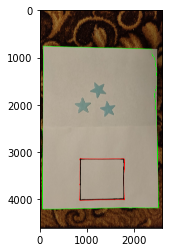

In [23]:
# обнаружение многоугольника и листа бумаги
# i - номер тестовой картинки 1,2,...,29 - валидные значения i
i = 1
img = cv2.imread('test/' + str(i) + '.jpg', 1)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
polygon, pos, paper = intelligent_placer.find_polygon_paper(img)
print("polygon position  is ", pos)
tmp_img = img.copy()
cv2.drawContours(tmp_img, [paper], 0, (0, 255, 0), 10)
cv2.drawContours(tmp_img, [polygon], 0, (255, 0, 0), 10)
plt.imshow(tmp_img)

In [26]:
# определение и идентификация контуров для i картики
nanes, cnt = intelligent_placer.identify_obj(img, paper, pos)
print(nanes)
tmp_img = img.copy()

['star', 'star', 'star']


In [27]:
ans_id = [['star', 'star', 'star'],
          ['loupe', 'star', 'star'],
          ['divider', 'marker'],
          ['sticker', 'Virt'],
          ['tardis', 'Virt'],
          ['loupe', 'star', 'pencil'],
          ['sticker', 'tardis'],
          ['sticker', 'tardis','eraser'],
          ['star', 'black_obj'],
          ['star', 'star', 'black_obj'],
          ['black_obj', 'marker'],
          ['sticker', 'tardis','eraser'],
          ['loupe', 'star'],
          ['sticker','blask_obj'],
          ['tardis','marker'],
          ['loupe', 'pencil','divider'],
          ['sticker', 'star', 'tardis'],
          ['eraser', 'sticker'],
          ['loupe', 'sticker', 'star'],
          ['loupe', 'sticker'],
          ['star', 'divider'],
          ['sticker', 'pencil'],
          ['sticker', 'divider'],
          ['marker', 'eraser'],
          ['sticker', 'tardis', 'Virt'],
          ['sticker', 'tardis', 'Virt', 'divider'],
          ['loupe', 'sticker'],
          ['sticker', 'tardis', 'Virt'],
          ['pencil','black_obj']]

In [29]:

res_id = []
for i in range(1,30):
    img = cv2.imread('test/' + str(i) + '.jpg', 1)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    polygon, pos, paper = intelligent_placer.find_polygon_paper(img)
    nanes, cnt = intelligent_placer.identify_obj(img, paper, pos)
    res_id.append(nanes)
    


In [35]:
import collections
dif_res = np.array([collections.Counter(ans_id[i]) == collections.Counter(res_id[i]) for i in range(29)],np.int8)
print("в общем:",sum(dif_res)/len(dif_res))
loupe_res = []
star_res = []
for i in range(29):
    if 'loupe' in ans_id[i]:
        loupe_res.append('loupe' in res_id[i])
    if 'star' in ans_id[i]:
        star_res.append('star' in res_id[i])
loup_res = np.array(loupe_res, np.int8)
star_res = np.array(star_res, np.int8)
#заметим, что специфические объекты(лупа, звезда) всегда находятся
print("лупа:",sum(loupe_res)/len(loupe_res))
print("звезда:",sum(star_res)/len(star_res))

в общем: 0.5172413793103449
лупа: 1.0
звезда: 1.0


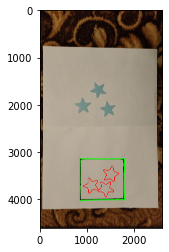

In [39]:
# тут можно посмотреть как размещаются объекты в виде картинки из тестовой выборки:
# Т.к. метод оптимизации использует рандомизированные значения, 
# расположение объектов может отличаться.
i = 1
img = cv2.imread('test/' + str(i) + '.jpg', 1)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
polygon, pos, paper = intelligent_placer.find_polygon_paper(img)
nanes, cnt = intelligent_placer.identify_obj(img, paper, pos)
res, cap_opt, arg_opt, phi_opt = intelligent_placer.knapsack_problem(polygon, nanes, cnt, 50)
k=0
new_cnts = []
if cap_opt != -1:
            for idc, cnt_el in enumerate(cnt):
                new_cnts.append(intelligent_placer.wrap(cnt_el, arg_opt[k], arg_opt[k + 1], phi_opt[idc]))
                k += 2

            imgtmp = img.copy()
            cv2.drawContours(imgtmp, [polygon], -1, [0, 255, 0], 20)
            cv2.drawContours(imgtmp, new_cnts, -1, [255, 0, 0], 10)
            plt.imshow(imgtmp)